<a class="anchor" id="0"></a>
# Random Forest Classifier with Feature Importance


Hello friends,


Random Forest is a supervised machine learning algorithm which is based on ensemble learning. In this kernel, I build two Random Forest Classifier models to predict whether a person makes over 50K a year, one with 10 decision-trees and another one with 100 decision-trees. The expected accuracy increases with number of decision-trees in the model. I have demonstrated the **feature selection process** using the Random Forest model to find only the important features, rebuild the model using these features and see its effect on accuracy. I have used the **Income classification data set** for this project.

**I hope you find this kernel useful and your <font color="red"><b>UPVOTES</b></font> would be very much appreciated.**

<a class="anchor" id="0.1"></a>
## Table of Contents


1.	[The problem statement](#1)
1.	[Import libraries](#2)
1.	[Import dataset](#3)
1.	[Exploratory data analysis](#4)
1.  [Explore categorical variables](#5)
1.  [Explore numerical variables](#6)
1.  [Declare feature vector and target variable](#7)
1.	[Split data into separate training and test set](#8)
1.	[Feature Engineering](#9)
1.  [Feature Scaling](#10)
1.	[Random Forest Classifier with default parameters](#11)
1.	[Random Forest Classifier with 100 Decision Tress](#12)
1.	[Find important features with Random Forest model](#13)
1.	[Visualize feature scores of the features](#14)
1.	[Build the Random Forest model on selected features](#15)
1.	[Confusion matrix](#16)
1.	[Classification report](#17)
1.	[Results and conclusion](#18)


## 1. The problem statement <a class="anchor" id="1"></a>

[Back to Table of Contents](#0.1)


In this kernel, I try to make predictions where the prediction task is to determine whether a person makes over 50K a year. I implement Random Forest Classification with Python and Scikit-Learn. So, to answer the question, I build a Random Forest classifier to predict whether a person makes over 50K a year.

I have used the **Income classification data set** for this project.


## 2. Import libraries <a class="anchor" id="2"></a>

[Back to Table of Contents](#0.1)



In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.


/kaggle/input/income-classification/income_evaluation.csv


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set(style="whitegrid")

In [3]:
import warnings

warnings.filterwarnings('ignore')

## 3. Import dataset <a class="anchor" id="3"></a>

[Back to Table of Contents](#0.1)


In [4]:
data = '/kaggle/input/income-classification/income_evaluation.csv'

df = pd.read_csv(data)

## 4. Exploratory data analysis <a class="anchor" id="4"></a>

[Back to Table of Contents](#0.1)


Now, I will explore the data to gain insights about the data. 

### 4.1  View dimensions of dataset <a class="anchor" id="4.1"></a>

In [5]:
# print the shape
print('The shape of the dataset : ', df.shape)

The shape of the dataset :  (32561, 15)


We can see that there are 32561 instances and 15 attributes in the data set.

### 4.2 Preview the dataset <a class="anchor" id="4.2"></a>

In [6]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


### 4.3 Rename column names <a class="anchor" id="4.3"></a>

We can see that the dataset does not have proper column names. The column names contain underscore. We should give proper names to the columns. I will do it as follows:-

In [7]:
col_names = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship',
             'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income']

df.columns = col_names

df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

### 4.4 View summary of dataset <a class="anchor" id="4.4"></a>

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education_num     32561 non-null int64
marital_status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital_gain      32561 non-null int64
capital_loss      32561 non-null int64
hours_per_week    32561 non-null int64
native_country    32561 non-null object
income            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


#### Findings

- We can see that the dataset contains 9 character variables and 6 numerical variables.

- `income` is the target variable.

- There are no missing values in the dataset. I will explore this later,

### 4.5 Check the data types of columns <a class="anchor" id="4.5"></a>

- The above `df.info()` command gives us the number of filled values along with the data types of columns.

- If we simply want to check the data type of a particular column, we can use the following command.

In [9]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
income            object
dtype: object

### 4.6 View statistical properties of dataset <a class="anchor" id="4.6"></a>

In [10]:
df.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


- The above `df.describe()` command presents statistical properties in vertical form.

- If we want to view the statistical properties in horizontal form, we should run the following command.

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
education_num,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
capital_gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
capital_loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
hours_per_week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


We can see that the above `df.describe().T` command presents statistical properties in horizontal form.

#### Important points to note


- The above command `df.describe()` helps us to view the statistical properties of numerical variables. It excludes character variables.

- If we want to view the statistical properties of character variables, we should run the following command -

        `df.describe(include=['object'])`

- If we want to view the statistical properties of all the variables, we should run the following command -

        `df.describe(include='all')`

In [12]:
df.describe(include='all')

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
count,32561.000000,32561,3.256100e+04,32561,32561.000000,32561,32561,32561,32561,32561,32561.000000,32561.000000,32561.000000,32561,32561
unique,NaN,9,NaN,16,NaN,7,15,6,5,2,NaN,NaN,NaN,42,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,22696,NaN,10501,NaN,14976,4140,13193,27816,21790,NaN,NaN,NaN,29170,24720
mean,38.581647,NaN,1.897784e+05,NaN,10.080679,NaN,NaN,NaN,NaN,NaN,1077.648844,87.303830,40.437456,NaN,NaN
std,13.640433,NaN,1.055500e+05,NaN,2.572720,NaN,NaN,NaN,NaN,NaN,7385.292085,402.960219,12.347429,NaN,NaN
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.178270e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.783560e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.370510e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


### 4.7 Check for missing values <a class="anchor" id="4.7"></a>


- In Python missing data is represented by two values:

   - **None** : None is a Python singleton object that is often used for missing data in Python code.

   - **NaN** : NaN is an acronym for Not a Number. It is a special floating-point value recognized by all systems   that use the standard IEEE floating-point representation.

- There are different methods in place on how to detect missing values.


#### Pandas isnull() and notnull() functions 

- Pandas offers two functions to test for missing values - **isnull()** and **notnull()**. 

- These are simple functions that return a boolean value indicating whether the passed in argument value is in fact missing data.


Below, I will list some useful commands to deal with missing values.


#### Useful commands to detect missing values 

- **df.isnull()**

The above command checks whether each cell in a dataframe contains missing values or not. If the cell contains missing value, it returns True otherwise it returns False.

- **df.isnull().sum()**

The above command returns total number of missing values in each column in the dataframe.

- **df.isnull().sum().sum()**

It returns total number of missing values in the dataframe.


- **df.isnull().mean()**

It returns percentage of missing values in each column in the dataframe.


- **df.isnull().any()**

It checks which column has null values and which has not. The columns which has null values returns TRUE and FALSE otherwise.

- **df.isnull().any().any()**

It returns a boolean value indicating whether the dataframe has missing values or not. If dataframe contains missing values it returns TRUE and FALSE otherwise.

- **df.isnull().values.any()**

It checks whether a particular column has missing values or not. If the column contains missing values, then it returns TRUE otherwise FALSE.

- **df.isnull().values.sum()**

It returns the total number of missing values in the dataframe.


In [13]:
# check for missing values

df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

#### Interpretation

We can see that there are no missing values in the dataset.

### 4.8 Check with ASSERT statement <a class="anchor" id="4.8"></a>


- We must confirm that our dataset has no missing values.

- We can write an **Assert statement** to verify this.

- We can use an assert statement to programmatically check that no missing, unexpected 0 or negative values are present.

- This gives us confidence that our code is running properly.

- **Assert statement** will return nothing if the value being tested is true and will throw an AssertionError if the value is false.

- Asserts

   - assert 1 == 1 (return Nothing if the value is True)

   - assert 1 == 2 (return AssertionError if the value is False)

In [14]:
#assert that there are no missing values in the dataframe

assert pd.notnull(df).all().all()

#### Interpretation

- The above command does not throw any error. Hence, it is confirmed that there are no missing or negative values in the dataset.

- All the values are greater than or equal to zero excluding character values.

### 4.9 Functional approach to EDA <a class="anchor" id="4.9"></a>

- An alternative approach to EDA is to write a function that presents initial EDA of dataset.

- We can write such a function as follows :-

In [15]:
def initial_eda(df):
    if isinstance(df, pd.DataFrame):
        total_na = df.isna().sum().sum()
        print("Dimensions : %d rows, %d columns" % (df.shape[0], df.shape[1]))
        print("Total NA Values : %d " % (total_na))
        print("%38s %10s     %10s %10s" % ("Column Name", "Data Type", "#Distinct", "NA Values"))
        col_name = df.columns
        dtyp = df.dtypes
        uniq = df.nunique()
        na_val = df.isna().sum()
        for i in range(len(df.columns)):
            print("%38s %10s   %10s %10s" % (col_name[i], dtyp[i], uniq[i], na_val[i]))
        
    else:
        print("Expect a DataFrame but got a %15s" % (type(df)))


In [16]:
initial_eda(df)

Dimensions : 32561 rows, 15 columns
Total NA Values : 0 
                           Column Name  Data Type      #Distinct  NA Values
                                   age      int64           73          0
                             workclass     object            9          0
                                fnlwgt      int64        21648          0
                             education     object           16          0
                         education_num      int64           16          0
                        marital_status     object            7          0
                            occupation     object           15          0
                          relationship     object            6          0
                                  race     object            5          0
                                   sex     object            2          0
                          capital_gain      int64          119          0
                          capital_loss      int64    

### Types of variables

- In this section, I segregate the dataset into categorical and numerical variables. 

- There are a mixture of categorical and numerical variables in the dataset. 

- Categorical variables have data type object. Numerical variables have data type int64.

- First of all, I will explore categorical variables.

## 5. Explore Categorical Variables <a class="anchor" id="5"></a>


[Back to Table of Contents](#0.1)

### 5.1 Find categorical variables 

In [17]:
categorical = [var for var in df.columns if df[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :\n\n', categorical)

There are 9 categorical variables

The categorical variables are :

 ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country', 'income']


### 5.2 Preview categorical variables 

In [18]:
df[categorical].head()

,workclass,education,marital_status,occupation,relationship,race,sex,native_country,income
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K


### 5.3 Summary of categorical variables 

- There are 9 categorical variables in the dataset.

- The categorical variables are given by `workclass`, `education`, `marital_status`, `occupation`, `relationship`, `race`, `sex`, `native_country` and `income`.

- `income` is the target variable.

### 5.4 Frequency distribution of categorical variables 

Now, we will check the frequency distribution of categorical variables.

In [19]:
for var in categorical: 
    
    print(df[var].value_counts())

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64
 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64
 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: marital_status, dtype: int64
 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial

### 5.5 Percentage of frequency distribution of values

In [20]:
for var in categorical:
    
     print(df[var].value_counts()/np.float(len(df)))

 Private             0.697030
 Self-emp-not-inc    0.078038
 Local-gov           0.064279
 ?                   0.056386
 State-gov           0.039864
 Self-emp-inc        0.034274
 Federal-gov         0.029483
 Without-pay         0.000430
 Never-worked        0.000215
Name: workclass, dtype: float64
 HS-grad         0.322502
 Some-college    0.223918
 Bachelors       0.164461
 Masters         0.052916
 Assoc-voc       0.042443
 11th            0.036086
 Assoc-acdm      0.032769
 10th            0.028654
 7th-8th         0.019840
 Prof-school     0.017690
 9th             0.015786
 12th            0.013298
 Doctorate       0.012684
 5th-6th         0.010227
 1st-4th         0.005160
 Preschool       0.001566
Name: education, dtype: float64
 Married-civ-spouse       0.459937
 Never-married            0.328092
 Divorced                 0.136452
 Separated                0.031479
 Widowed                  0.030497
 Married-spouse-absent    0.012837
 Married-AF-spouse        0.000706
Name:

#### Comment

- Now, we can see that there are several variables like `workclass`, `occupation` and `native_country` which contain missing values. 

- Generally, the missing values are coded as `NaN` and python will detect them with the usual command of df.isnull().sum().

- But, in this case the missing values are coded as `?`. Python fail to detect these as missing values because it does not consider `?` as missing values. 

- So, I have to replace `?` with `NaN` so that Python can detect these missing values.

- I will explore these variables and replace `?` with `NaN`.

### 5.6 Explore the variables 

#### Explore `income` target variable 

In [21]:
# check for missing values

df['income'].isnull().sum()

0

We can see that there are no missing values in the `income` target variable.

In [22]:
# view number of unique values

df['income'].nunique()

2

There are 2 unique values in the `income` variable.

In [23]:
# view the unique values

df['income'].unique()

array([' <=50K', ' >50K'], dtype=object)

The two unique values are `<=50K` and `>50K`.

In [24]:
# view the frequency distribution of values

df['income'].value_counts()

 <=50K    24720
 >50K      7841
Name: income, dtype: int64

In [25]:
# view percentage of frequency distribution of values

df['income'].value_counts()/len(df)

 <=50K    0.75919
 >50K     0.24081
Name: income, dtype: float64

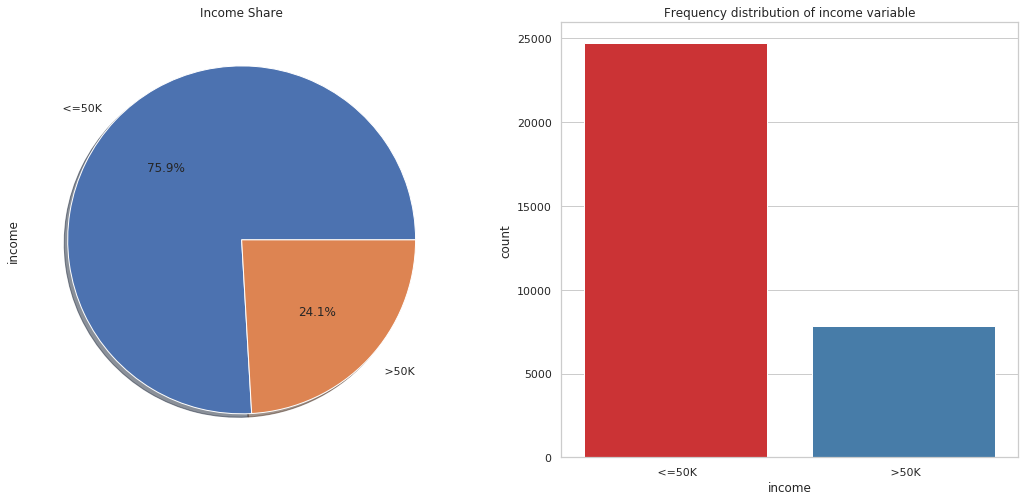

In [26]:
# visualize frequency distribution of income variable

f,ax=plt.subplots(1,2,figsize=(18,8))

ax[0] = df['income'].value_counts().plot.pie(explode=[0,0],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Income Share')


#f, ax = plt.subplots(figsize=(6, 8))
ax[1] = sns.countplot(x="income", data=df, palette="Set1")
ax[1].set_title("Frequency distribution of income variable")

plt.show()

We can plot the bars horizontally as follows :-

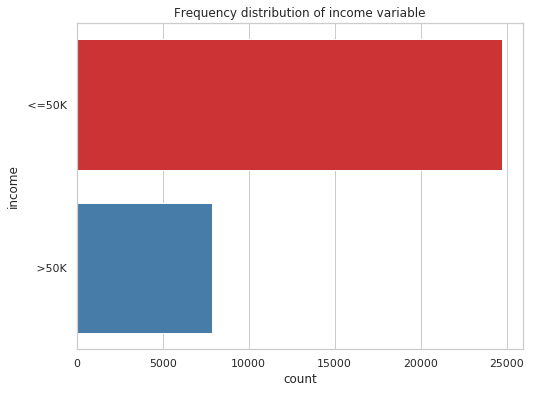

In [27]:
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.countplot(y="income", data=df, palette="Set1")
ax.set_title("Frequency distribution of income variable")
plt.show()

#### Visualize `income` wrt `sex` variable

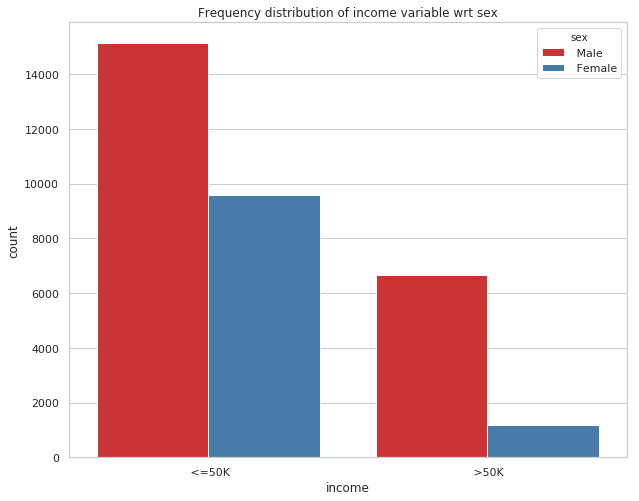

In [28]:
f, ax = plt.subplots(figsize=(10, 8))
ax = sns.countplot(x="income", hue="sex", data=df, palette="Set1")
ax.set_title("Frequency distribution of income variable wrt sex")
plt.show()

#### Interpretation


- We can see that males make more money than females in both the income categories.

#### Visualize `income` wrt `race`

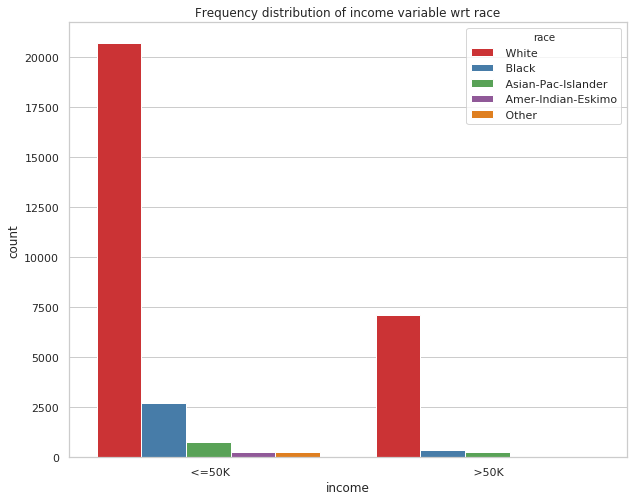

In [29]:
f, ax = plt.subplots(figsize=(10, 8))
ax = sns.countplot(x="income", hue="race", data=df, palette="Set1")
ax.set_title("Frequency distribution of income variable wrt race")
plt.show()

#### Interpretation


- We can see that whites make more money than non-whites in both the income categories.

#### Explore `workclass` variable

In [30]:
# check number of unique labels 

df.workclass.nunique()

9

In [31]:
# view the unique labels

df.workclass.unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [32]:
# view frequency distribution of values

df.workclass.value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

We can see that there are 1836 values encoded as `?` in workclass variable. I will replace these `?` with `NaN`.

In [33]:
# replace '?' values in workclass variable with `NaN`

df['workclass'].replace(' ?', np.NaN, inplace=True)

In [34]:
# again check the frequency distribution of values in workclass variable

df.workclass.value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

- Now, we can see that there are no values encoded as `?` in the workclass variable.

- I will adopt similar approach with `occupation` and `native_country` column.

#### Visualize `workclass` variable

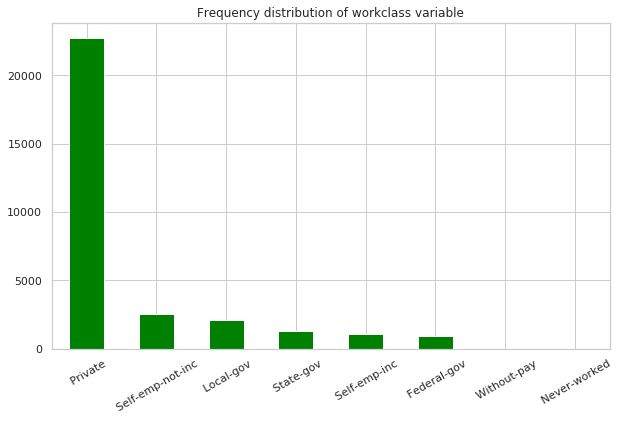

In [35]:
f, ax = plt.subplots(figsize=(10, 6))
ax = df.workclass.value_counts().plot(kind="bar", color="green")
ax.set_title("Frequency distribution of workclass variable")
ax.set_xticklabels(df.workclass.value_counts().index, rotation=30)
plt.show()

#### Interpretation


- We can see that there are lot more private workers than other category of workers.

#### Visualize `workclass` variable wrt `income` variable

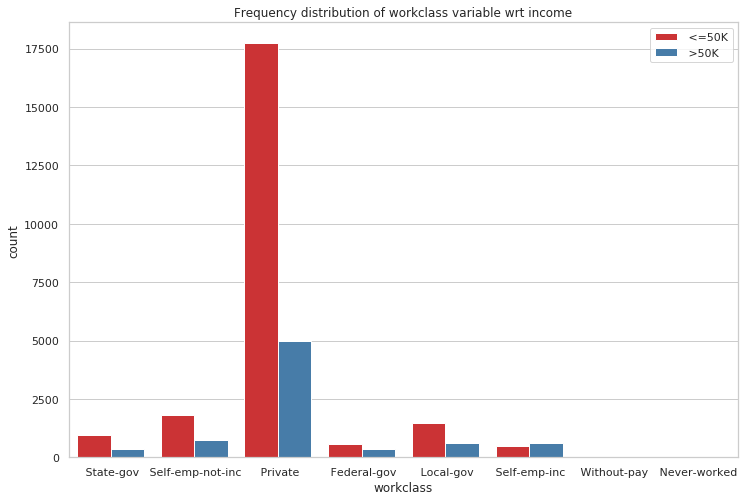

In [36]:
f, ax = plt.subplots(figsize=(12, 8))
ax = sns.countplot(x="workclass", hue="income", data=df, palette="Set1")
ax.set_title("Frequency distribution of workclass variable wrt income")
ax.legend(loc='upper right')
plt.show()

#### Interpretation


- We can see that workers make less than equal to 50k in most of the working categories.

- But this trend is more appealing in Private `workclass` category.

#### Visualize `workclass` variable wrt `sex` variable

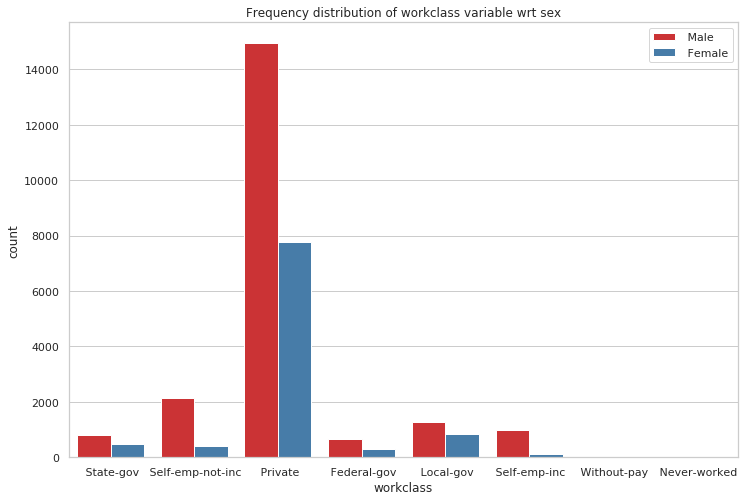

In [37]:
f, ax = plt.subplots(figsize=(12, 8))
ax = sns.countplot(x="workclass", hue="sex", data=df, palette="Set1")
ax.set_title("Frequency distribution of workclass variable wrt sex")
ax.legend(loc='upper right')
plt.show()

#### Interpretation


- We can see that there are more male workers than female workers in all the working category.

- The trend is more appealing in Private sector.

#### Explore `occupation` variable

In [38]:
# check number of unique labels

df.occupation.nunique()

15

In [39]:
# view unique labels

df.occupation.unique()


array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [40]:
# view frequency distribution of values

df.occupation.value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64

We can see that there are 1843 values encoded as `?` in occupation variable. I will replace these `?` with `NaN`.

In [41]:
# replace '?' values in occupation variable with `NaN`

df['occupation'].replace(' ?', np.NaN, inplace=True)


In [42]:
# again check the frequency distribution of values

df.occupation.value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64

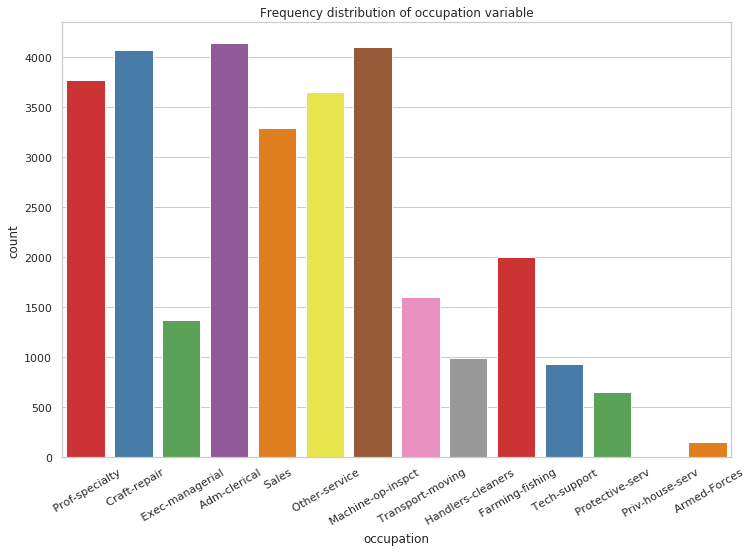

In [43]:
# visualize frequency distribution of `occupation` variable

f, ax = plt.subplots(figsize=(12, 8))
ax = sns.countplot(x="occupation", data=df, palette="Set1")
ax.set_title("Frequency distribution of occupation variable")
ax.set_xticklabels(df.occupation.value_counts().index, rotation=30)
plt.show()

#### Explore `native_country` variable

In [44]:
# check number of unique labels

df.native_country.nunique()

42

In [45]:
# view unique labels 

df.native_country.unique()


array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [46]:
# check frequency distribution of values

df.native_country.value_counts()


 United-States                 29170
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

We can see that there are 583 values encoded as `?` in native_country variable. I will replace these `?` with `NaN`.

In [47]:
# replace '?' values in native_country variable with `NaN`

df['native_country'].replace(' ?', np.NaN, inplace=True)

In [48]:
# again check the frequency distribution of values

df.native_country.value_counts()

 United-States                 29170
 Mexico                          643
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 Greece                           29
 

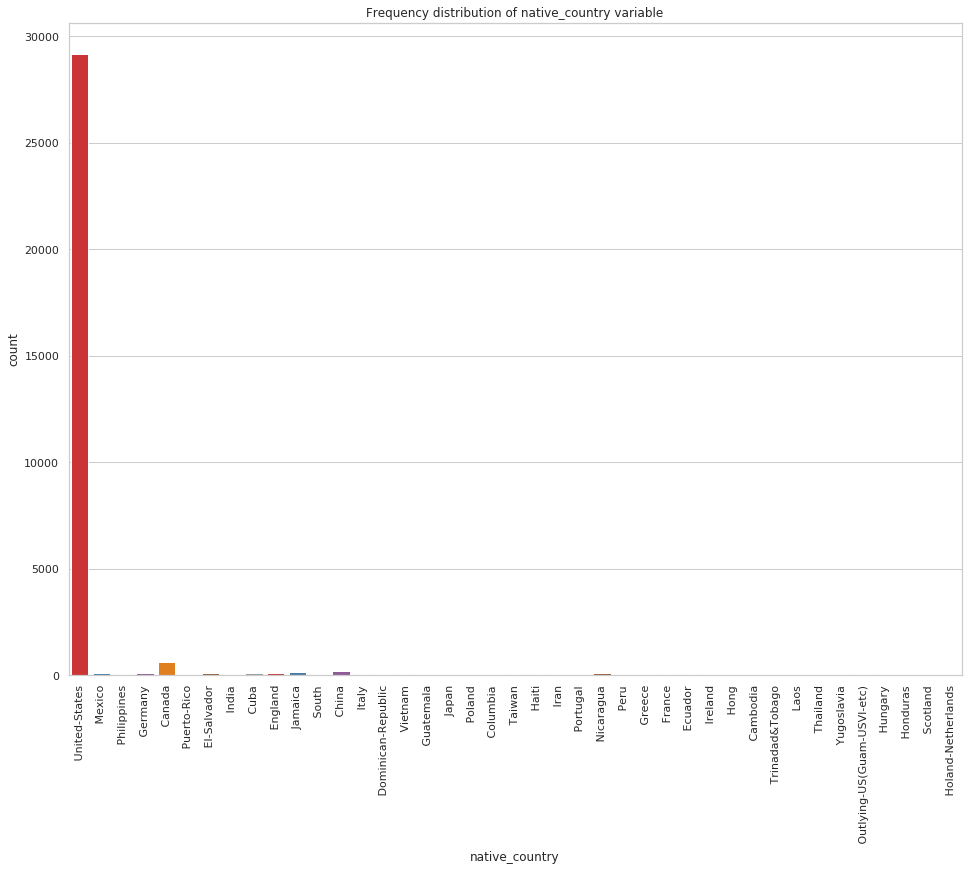

In [49]:
# visualize frequency distribution of `native_country` variable

f, ax = plt.subplots(figsize=(16, 12))
ax = sns.countplot(x="native_country", data=df, palette="Set1")
ax.set_title("Frequency distribution of native_country variable")
ax.set_xticklabels(df.native_country.value_counts().index, rotation=90)
plt.show()

We can see that `United-States` dominate amongst the `native_country` variables.

### 5.7 Check missing values in categorical variables 

In [50]:
df[categorical].isnull().sum()

workclass         1836
education            0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
native_country     583
income               0
dtype: int64

Now, we can see that `workclass`, `occupation` and `native_country` variable contains missing values.

### 5.8 Number of labels: Cardinality 

- The number of labels within a categorical variable is known as **cardinality**. 

- A high number of labels within a variable is known as **high cardinality**. 

- High cardinality may pose some serious problems in the machine learning model. So, I will check for high cardinality.

In [51]:
# check for cardinality in categorical variables

for var in categorical:
    
    print(var, ' contains ', len(df[var].unique()), ' labels')

workclass  contains  9  labels
education  contains  16  labels
marital_status  contains  7  labels
occupation  contains  15  labels
relationship  contains  6  labels
race  contains  5  labels
sex  contains  2  labels
native_country  contains  42  labels
income  contains  2  labels


We can see that native_country column contains relatively large number of labels as compared to other columns. I will check for cardinality after train-test split.

## 6. Explore Numerical Variables <a class="anchor" id="6"></a>


[Back to Table of Contents](#0.1)

### 6.1  Find numerical variables 

In [52]:
numerical = [var for var in df.columns if df[var].dtype!='O']

print('There are {} numerical variables\n'.format(len(numerical)))

print('The numerical variables are :\n\n', numerical)

There are 6 numerical variables

The numerical variables are :

 ['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']


### 6.2 Preview the numerical variables

In [53]:
df[numerical].head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,39,77516,13,2174,0,40
1,50,83311,13,0,0,13
2,38,215646,9,0,0,40
3,53,234721,7,0,0,40
4,28,338409,13,0,0,40


### 6.3 Summary of numerical variables

- There are 6 numerical variables.

- These are given by `age`, `fnlwgt`, `education_num`,`capital_gain`, `capital_loss` and `hours_per_week`.

- All of the numerical variables are of discrete data type.

### 6.4 Check missing values in numerical variables 

In [54]:
df[numerical].isnull().sum()

age               0
fnlwgt            0
education_num     0
capital_gain      0
capital_loss      0
hours_per_week    0
dtype: int64

We can see that there are no missing values in the numerical variables.

### 6.5 Explore numerical variables

#### Explore `age` variable

In [55]:
df['age'].nunique()

73

#### View the distribution of `age` variable

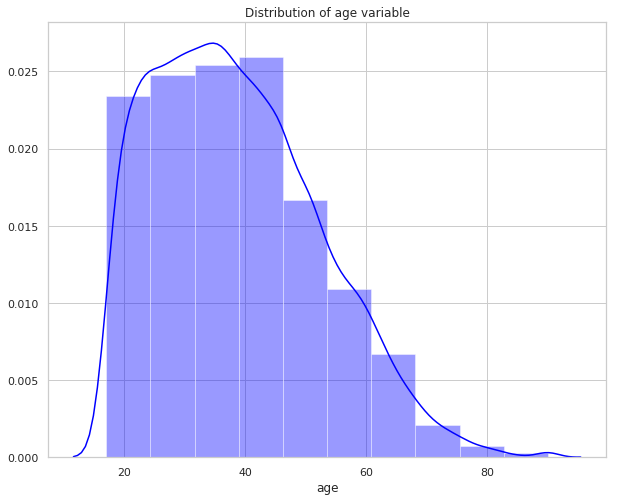

In [56]:
f, ax = plt.subplots(figsize=(10,8))
x = df['age']
ax = sns.distplot(x, bins=10, color='blue')
ax.set_title("Distribution of age variable")
plt.show()

We can see that `age` is slightly positively skewed.

We can use Pandas series object to get an informative axis label as follows :-

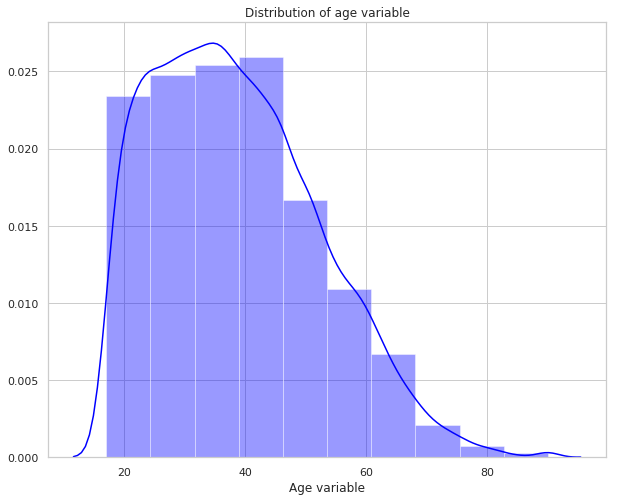

In [57]:
f, ax = plt.subplots(figsize=(10,8))
x = df['age']
x = pd.Series(x, name="Age variable")
ax = sns.distplot(x, bins=10, color='blue')
ax.set_title("Distribution of age variable")
plt.show()

We can shade under the density curve and use a different color as follows:-

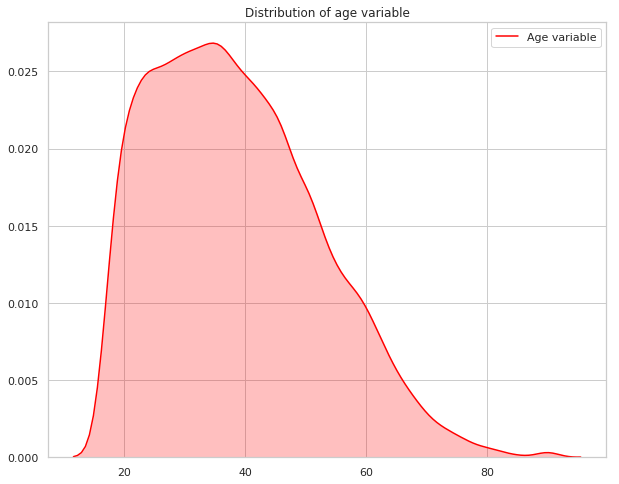

In [58]:
f, ax = plt.subplots(figsize=(10,8))
x = df['age']
x = pd.Series(x, name="Age variable")
ax = sns.kdeplot(x, shade=True, color='red')
ax.set_title("Distribution of age variable")
plt.show()

#### Detect outliers in `age` variable with boxplot

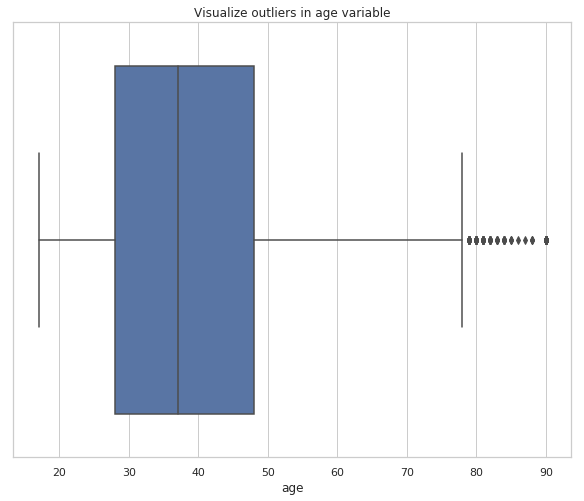

In [59]:
f, ax = plt.subplots(figsize=(10,8))
x = df['age']
ax = sns.boxplot(x)
ax.set_title("Visualize outliers in age variable")
plt.show()

We can see that there are lots of outliers in `age` variable.

#### Explore relationship between `age` and `income` variables

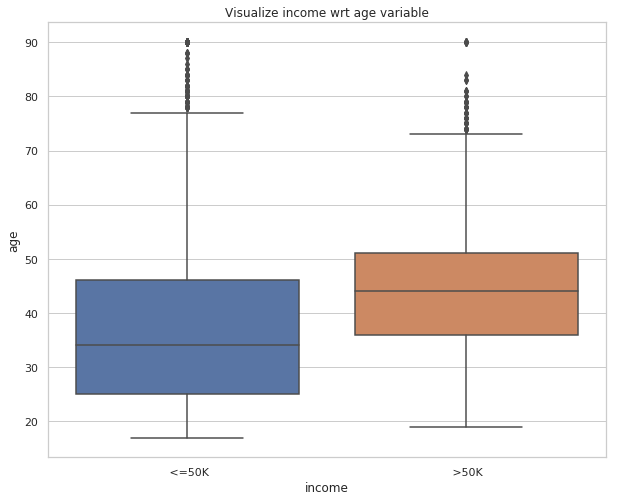

In [60]:
f, ax = plt.subplots(figsize=(10, 8))
ax = sns.boxplot(x="income", y="age", data=df)
ax.set_title("Visualize income wrt age variable")
plt.show()

#### Interpretation

- As expected, younger people make less money as compared to senior people.

#### Visualize `income` wrt `age` and `sex` variable

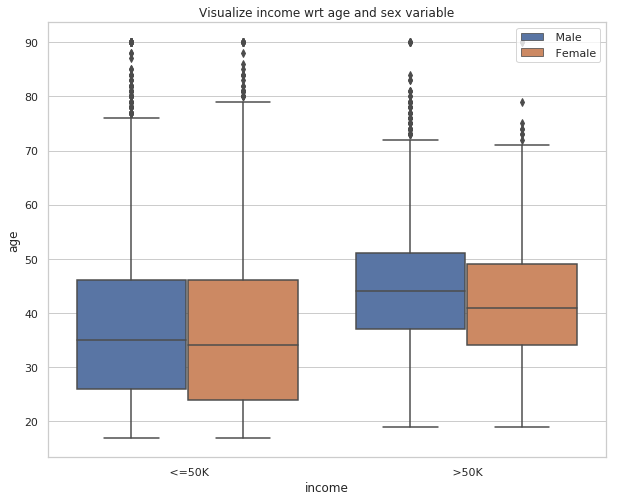

In [61]:
f, ax = plt.subplots(figsize=(10, 8))
ax = sns.boxplot(x="income", y="age", hue="sex", data=df)
ax.set_title("Visualize income wrt age and sex variable")
ax.legend(loc='upper right')
plt.show()

<Figure size 576x432 with 0 Axes>

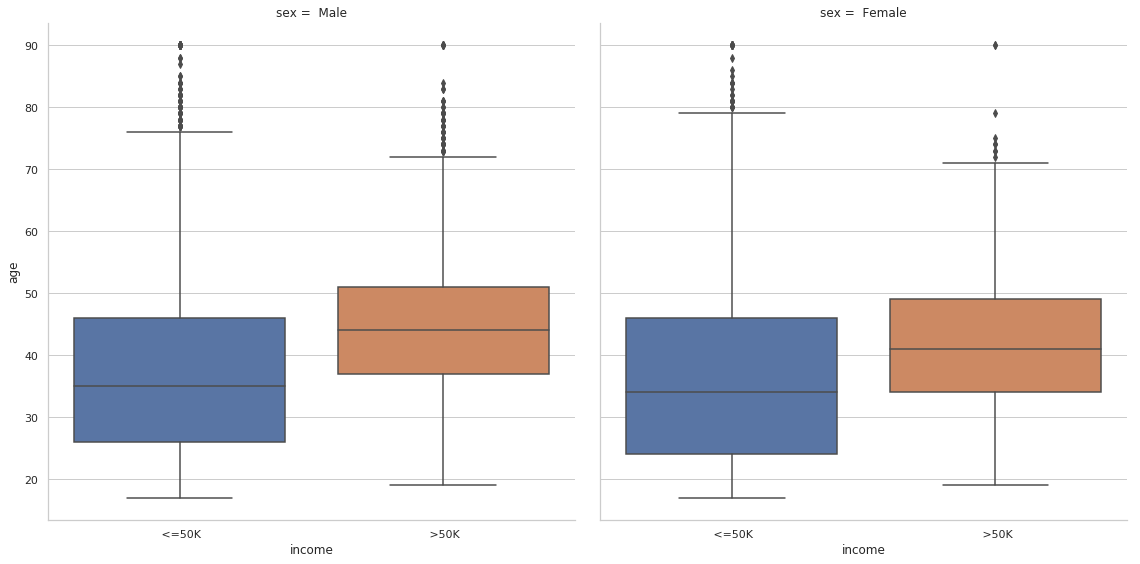

In [62]:
plt.figure(figsize=(8,6))
ax = sns.catplot(x="income", y="age", col="sex", data=df, kind="box", height=8, aspect=1)
plt.show()

#### Interpretation

- Senior people make more money than younger people.

#### Visualize relationship between `race` and `age`

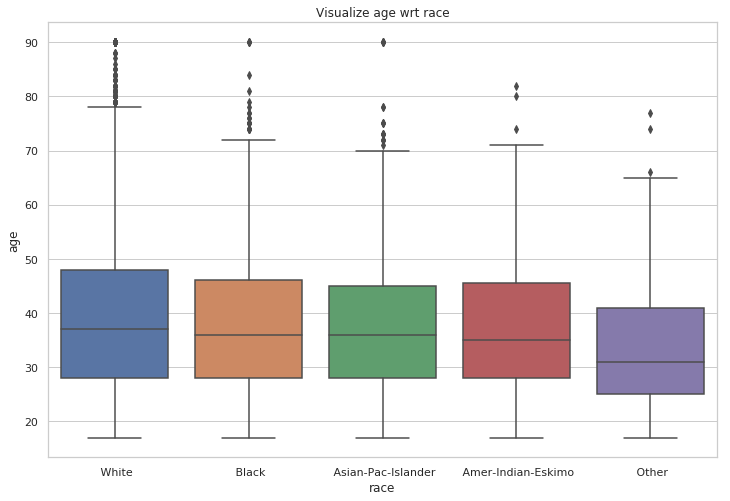

In [63]:
plt.figure(figsize=(12,8))
sns.boxplot(x ='race', y="age", data = df)
plt.title("Visualize age wrt race")
plt.show()

#### Interpretation

- Whites are more older than other groups of people.

#### Find out the correlations

In [64]:
# plot correlation heatmap to find out correlations

df.corr().style.format("{:.4}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
age,1.0,-0.07665,0.03653,0.07767,0.05777,0.06876
fnlwgt,-0.07665,1.0,-0.04319,0.0004319,-0.01025,-0.01877
education_num,0.03653,-0.04319,1.0,0.1226,0.07992,0.1481
capital_gain,0.07767,0.0004319,0.1226,1.0,-0.03162,0.07841
capital_loss,0.05777,-0.01025,0.07992,-0.03162,1.0,0.05426
hours_per_week,0.06876,-0.01877,0.1481,0.07841,0.05426,1.0


#### Interpretation

- We can see that there is no strong correlation between variables.

#### Plot pairwise relationships in dataset

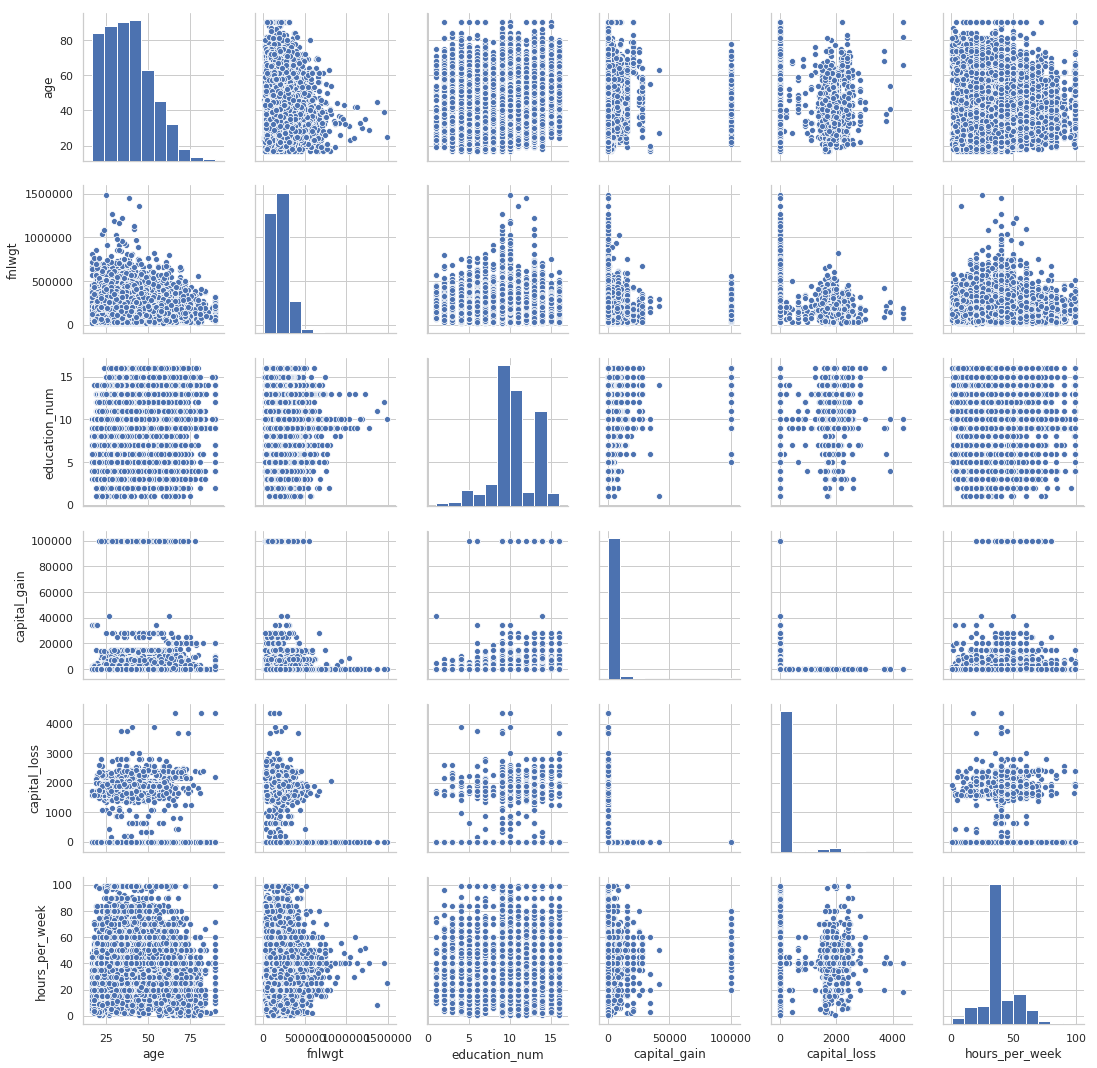

In [65]:
sns.pairplot(df)
plt.show()

#### Interpretation

- We can see that `age` and `fnlwgt` are positively skewed.

- The variable `education_num` is negatively skewed while `hours_per_week` is normally distributed.

- There exists weak positive correlation between `capital_gain` and `education_num` (correlation coefficient=0.1226). 

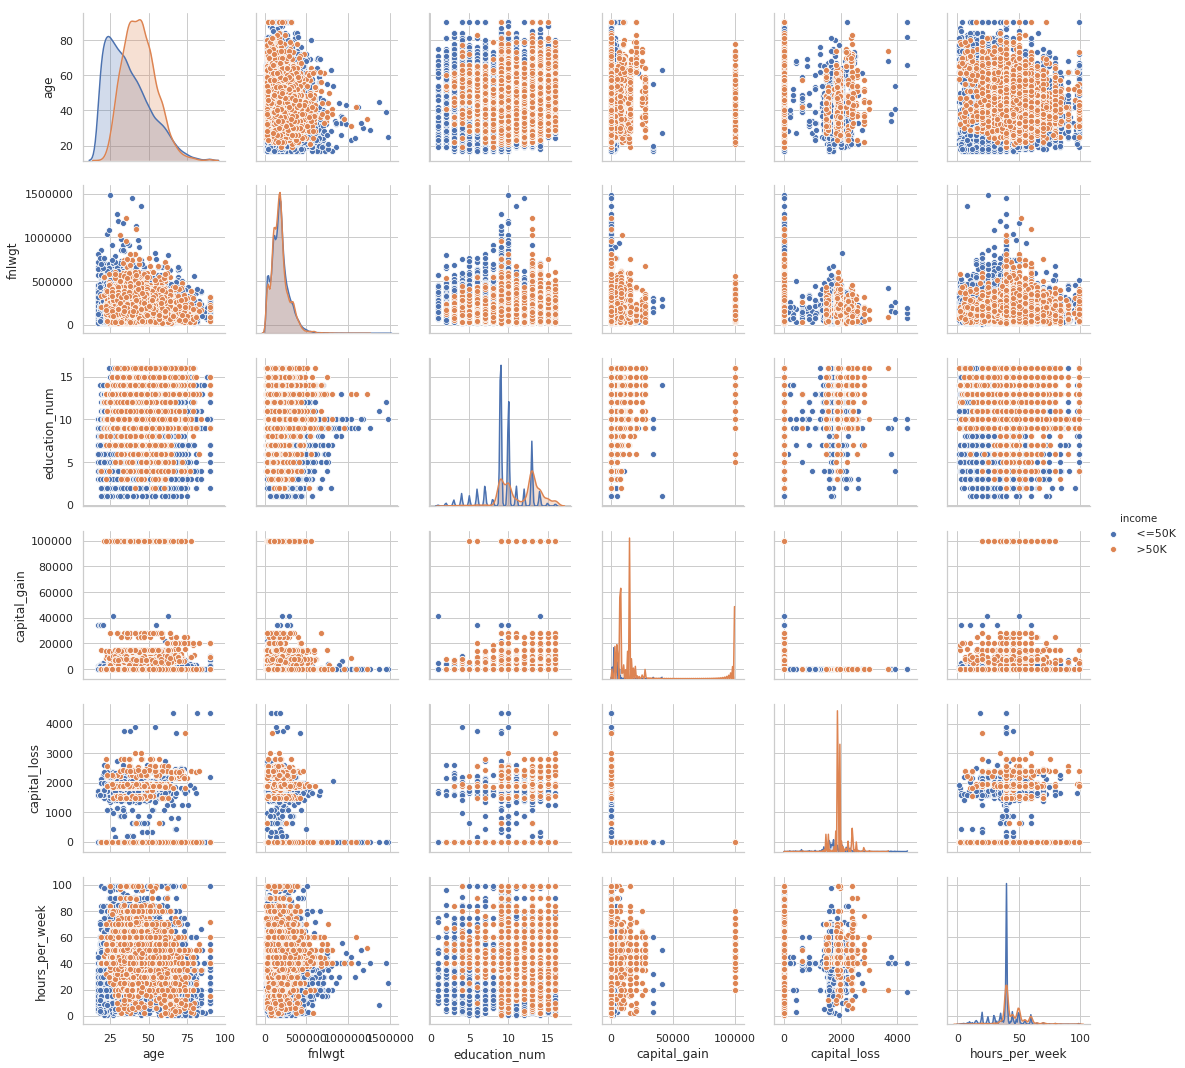

In [66]:
sns.pairplot(df, hue="income")
plt.show()

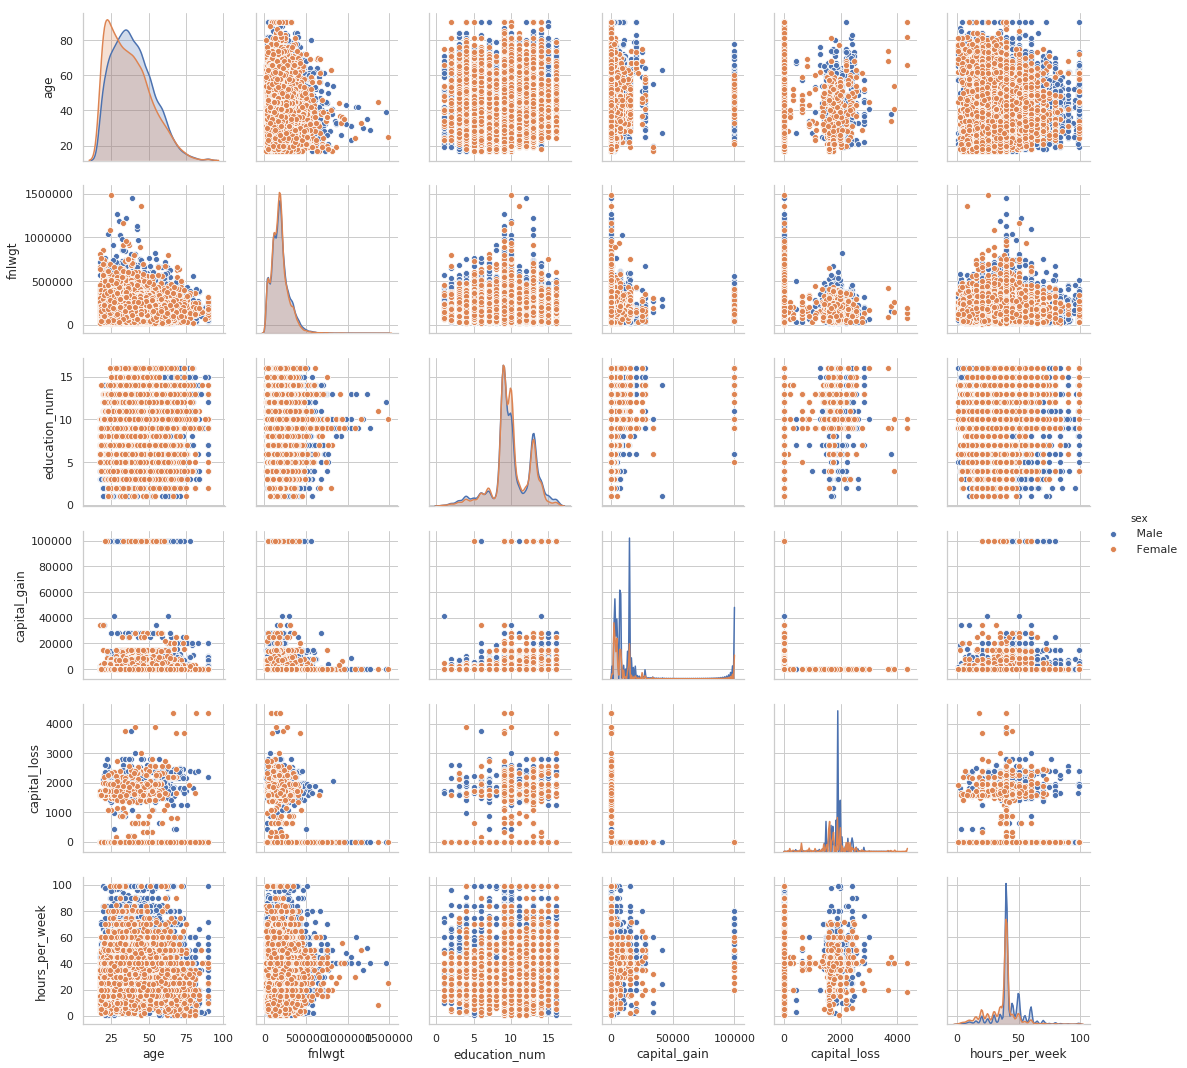

In [67]:
sns.pairplot(df, hue="sex")
plt.show()

## 7. Declare feature vector and target variable <a class="anchor" id="7"></a>

[Back to Table of Contents](#0.1)

In [68]:
X = df.drop(['income'], axis=1)

y = df['income']

## 8. Split data into separate training and test set <a class="anchor" id="8"></a>

[Back to Table of Contents](#0.1)

In [69]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)


In [70]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((22792, 14), (9769, 14))

## 9. Feature Engineering  <a class="anchor" id="9"></a>


[Back to Table of Contents](#0.1)


- **Feature Engineering** is the process of transforming raw data into useful features that help us to understand our model better and increase its predictive power. 

- I will carry out feature engineering on different types of variables.

- First, I will display the categorical and numerical variables in training set separately.

### 9.1 Display categorical variables in training set


In [71]:
categorical = [col for col in X_train.columns if X_train[col].dtypes == 'O']

categorical

['workclass',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country']

### 9.2 Display numerical variables in training set


In [72]:
numerical = [col for col in X_train.columns if X_train[col].dtypes != 'O']

numerical

['age',
 'fnlwgt',
 'education_num',
 'capital_gain',
 'capital_loss',
 'hours_per_week']

### 9.3 Engineering missing values in categorical variables

In [73]:
# print percentage of missing values in the categorical variables in training set

X_train[categorical].isnull().mean()

workclass         0.055985
education         0.000000
marital_status    0.000000
occupation        0.056072
relationship      0.000000
race              0.000000
sex               0.000000
native_country    0.018164
dtype: float64

In [74]:
# print categorical variables with missing data

for col in categorical:
    if X_train[col].isnull().mean()>0:
        print(col, (X_train[col].isnull().mean()))

workclass 0.055984555984555984
occupation 0.05607230607230607
native_country 0.018164268164268166


In [75]:
# impute missing categorical variables with most frequent value

for df2 in [X_train, X_test]:
    df2['workclass'].fillna(X_train['workclass'].mode()[0], inplace=True)
    df2['occupation'].fillna(X_train['occupation'].mode()[0], inplace=True)
    df2['native_country'].fillna(X_train['native_country'].mode()[0], inplace=True)    

In [76]:
# check missing values in categorical variables in X_train

X_train[categorical].isnull().sum()

workclass         0
education         0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
native_country    0
dtype: int64

In [77]:
# check missing values in categorical variables in X_test

X_test[categorical].isnull().sum()

workclass         0
education         0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
native_country    0
dtype: int64

As a final check, I will check for missing values in X_train and X_test.

In [78]:
# check missing values in X_train

X_train.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
dtype: int64

In [79]:
# check missing values in X_test

X_test.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
dtype: int64

We can see that there are no missing values in X_train and X_test.

### 9.4 Encode categorical variables


In [80]:
# preview categorical variables in X_train

X_train[categorical].head()

,workclass,education,marital_status,occupation,relationship,race,sex,native_country
32098,Private,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,Male,United-States
25206,State-gov,HS-grad,Divorced,Adm-clerical,Unmarried,White,Female,United-States
23491,Private,Some-college,Married-civ-spouse,Sales,Husband,White,Male,United-States
12367,Private,HS-grad,Never-married,Craft-repair,Not-in-family,White,Male,Guatemala
7054,Private,7th-8th,Never-married,Craft-repair,Not-in-family,White,Male,Germany


In [81]:
# import category encoders

import category_encoders as ce

In [82]:
# encode categorical variables with one-hot encoding

encoder = ce.OneHotEncoder(cols=['workclass', 'education', 'marital_status', 'occupation', 'relationship', 
                                 'race', 'sex', 'native_country'])

X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [83]:
X_train.head()

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,workclass_8,fnlwgt,...,native_country_32,native_country_33,native_country_34,native_country_35,native_country_36,native_country_37,native_country_38,native_country_39,native_country_40,native_country_41
32098,45,1,0,0,0,0,0,0,0,170871,...,0,0,0,0,0,0,0,0,0,0
25206,47,0,1,0,0,0,0,0,0,108890,...,0,0,0,0,0,0,0,0,0,0
23491,48,1,0,0,0,0,0,0,0,187505,...,0,0,0,0,0,0,0,0,0,0
12367,29,1,0,0,0,0,0,0,0,145592,...,0,0,0,0,0,0,0,0,0,0
7054,23,1,0,0,0,0,0,0,0,203003,...,0,0,0,0,0,0,0,0,0,0


In [84]:
X_train.shape

(22792, 105)

We can see that from the initial 14 columns, we now have 105 columns in training set.

Similarly, I will take a look at the X_test set.

In [85]:
X_test.head()

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,workclass_8,fnlwgt,...,native_country_32,native_country_33,native_country_34,native_country_35,native_country_36,native_country_37,native_country_38,native_country_39,native_country_40,native_country_41
22278,27,1,0,0,0,0,0,0,0,177119,...,0,0,0,0,0,0,0,0,0,0
8950,27,1,0,0,0,0,0,0,0,216481,...,0,0,0,0,0,0,0,0,0,0
7838,25,1,0,0,0,0,0,0,0,256263,...,0,0,0,0,0,0,0,0,0,0
16505,46,1,0,0,0,0,0,0,0,147640,...,0,0,0,0,0,0,0,0,0,0
19140,45,1,0,0,0,0,0,0,0,172822,...,0,0,0,0,0,0,0,0,0,0


In [86]:
X_test.shape

(9769, 105)

* We now have training and testing set ready for model building. Before that, we should map all the feature variables onto the same scale. It is called **feature scaling**. We will do it as follows.

## 10. Feature Scaling <a class="anchor" id="10"></a>

[Back to Table of Contents](#0.1)

In [87]:
cols = X_train.columns


In [88]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)


In [89]:
X_train = pd.DataFrame(X_train, columns=[cols])

In [90]:
X_test = pd.DataFrame(X_test, columns=[cols])

We now have X_train dataset ready to be fed into the Random Forest classifier. We will do it as follows.

## 11. Random Forest Classifier model with default parameters <a class="anchor" id="11"></a>


[Back to Table of Contents](#0.1)

In [91]:
# import Random Forest classifier

from sklearn.ensemble import RandomForestClassifier



# instantiate the classifier 

rfc = RandomForestClassifier(random_state=0)



# fit the model

rfc.fit(X_train, y_train)



# Predict the Test set results

y_pred = rfc.predict(X_test)



# Check accuracy score 

from sklearn.metrics import accuracy_score

print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with 10 decision-trees : 0.8446


Here, **y_test** are the true class labels and **y_pred** are the predicted class labels in the test-set.

Here, I have build the Random Forest Classifier model with default parameter of `n_estimators = 10`. So, I have used 10 decision-trees to build the model. Now, I will increase the number of decision-trees and see its effect on accuracy.

## 12. Random Forest Classifier model with 100 Decision Trees  <a class="anchor" id="12"></a>



[Back to Table of Contents](#0.1)

In [92]:
# instantiate the classifier with n_estimators = 100

rfc_100 = RandomForestClassifier(n_estimators=100, random_state=0)



# fit the model to the training set

rfc_100.fit(X_train, y_train)



# Predict on the test set results

y_pred_100 = rfc_100.predict(X_test)



# Check accuracy score 

print('Model accuracy score with 100 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred_100)))

Model accuracy score with 100 decision-trees : 0.8521


The model accuracy score with 10 decision-trees is 0.8446 but the same with 100 decision-trees is 0.8521. So, as expected accuracy increases with number of decision-trees in the model.

## 13. Find important features with Random Forest model <a class="anchor" id="13"></a>


[Back to Table of Contents](#0.1)


Until now, I have used all the features given in the model. Now, I will select only the important features, build the model using these features and see its effect on accuracy. 


First, I will create the Random Forest model as follows:-

In [93]:
# create the classifier with n_estimators = 100

clf = RandomForestClassifier(n_estimators=100, random_state=0)



# fit the model to the training set

clf.fit(X_train, y_train)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

Now, I will use the feature importance variable to see feature importance scores.

In [94]:
# view the feature scores

feature_scores = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_scores

fnlwgt               0.159772
age                  0.149074
capital_gain         0.091299
hours_per_week       0.086339
education_num        0.065130
                       ...   
native_country_16    0.000028
occupation_14        0.000015
native_country_35    0.000009
workclass_8          0.000008
native_country_41    0.000000
Length: 105, dtype: float64

We can see that the most important feature is `fnlwgt` and least important feature is `native_country_41`.

## 14. Visualize feature scores of the features <a class="anchor" id="14"></a>


[Back to Table of Contents](#0.1)


Now, I will visualize the feature scores with matplotlib and seaborn.

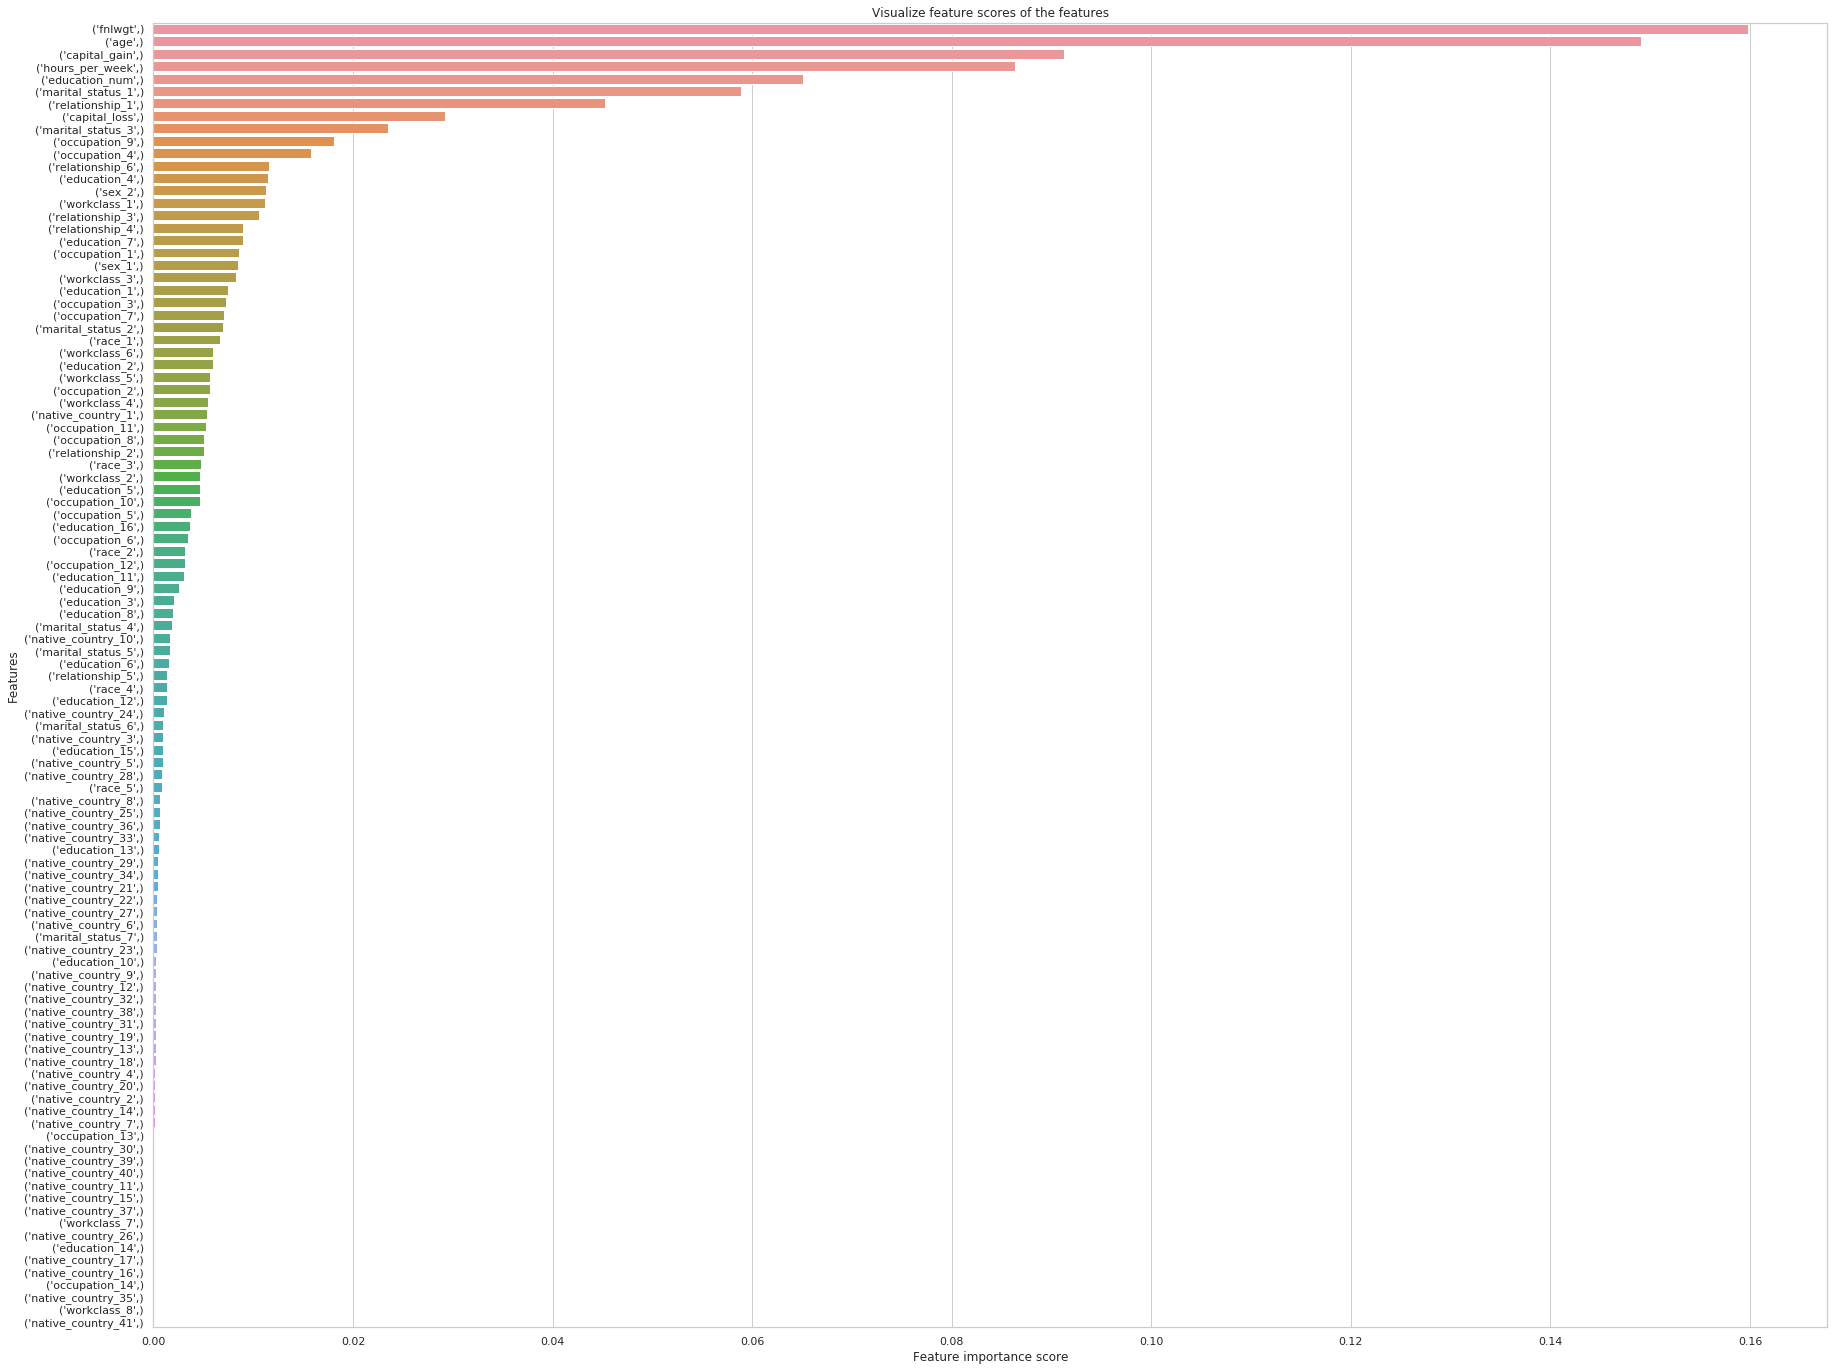

In [95]:
# Creating a seaborn bar plot

f, ax = plt.subplots(figsize=(30, 24))
ax = sns.barplot(x=feature_scores, y=feature_scores.index, data=df)
ax.set_title("Visualize feature scores of the features")
ax.set_yticklabels(feature_scores.index)
ax.set_xlabel("Feature importance score")
ax.set_ylabel("Features")
plt.show()


#### Interpretation


- The above plot confirms that the most important feature is `fnlwgt` and least important feature is `native_country_41`.

## 15. Build the Random Forest model on selected features <a class="anchor" id="15"></a>


[Back to Table of Contents](#0.1)


Now, I will drop the least important feature `native_country_41` from the model, rebuild the model and check its effect on accuracy.

In [96]:
# drop the least important feature from X_train and X_test

X_train = X_train.drop(['native_country_41'], axis=1)

X_test = X_test.drop(['native_country_41'], axis=1)


Now, I will build the random forest model again and check accuracy.

In [97]:
# instantiate the classifier with n_estimators = 100

clf = RandomForestClassifier(n_estimators=100, random_state=0)



# fit the model to the training set

clf.fit(X_train, y_train)


# Predict on the test set results

y_pred = clf.predict(X_test)



# Check accuracy score 

print('Model accuracy score with native_country_41 variable removed : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))


Model accuracy score with native_country_41 variable removed : 0.8544


#### Interpretation

- I have removed the `native_country_41` variable from the model, rebuild it and checked its accuracy. 

- The accuracy of the model now comes out to be 0.8544. 

- The accuracy of the model with all the variables taken into account is 0.8521. 

- So, we can see that the model accuracy has been improved with `native_country_41` variable removed from the model.

Now, based on the above analysis we can conclude that our classification model accuracy is very good. Our model is doing a very good job in terms of predicting the class labels.


But, it does not give the underlying distribution of values. Also, it does not tell anything about the type of errors our classifer is making. 


We have another tool called `Confusion matrix` that comes to our rescue.

## 16. Confusion matrix <a class="anchor" id="16"></a>


[Back to Table of Contents](#0.1)


A confusion matrix is a tool for summarizing the performance of a classification algorithm. A confusion matrix will give us a clear picture of classification model performance and the types of errors produced by the model. It gives us a summary of correct and incorrect predictions broken down by each category. The summary is represented in a tabular form.


Four types of outcomes are possible while evaluating a classification model performance. These four outcomes are described below:-


**True Positives (TP)** – True Positives occur when we predict an observation belongs to a certain class and the observation actually belongs to that class.


**True Negatives (TN)** – True Negatives occur when we predict an observation does not belong to a certain class and the observation actually does not belong to that class.


**False Positives (FP)** – False Positives occur when we predict an observation belongs to a    certain class but the observation actually does not belong to that class. This type of error is called **Type I error.**



**False Negatives (FN)** – False Negatives occur when we predict an observation does not belong to a certain class but the observation actually belongs to that class. This is a very serious error and it is called **Type II error.**



These four outcomes are summarized in a confusion matrix given below.


In [98]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)



Confusion matrix

 [[6867  540]
 [ 882 1480]]


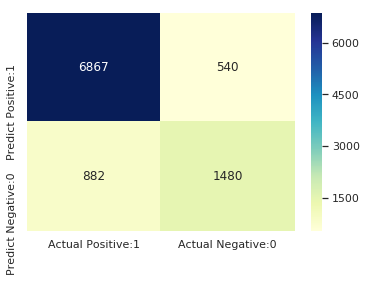

In [99]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

## 17. Classification Report <a class="anchor" id="17"></a>


[Back to Table of Contents](#0.1)


**Classification report** is another way to evaluate the classification model performance. It displays the  **precision**, **recall**, **f1** and **support** scores for the model. I have described these terms in later.

We can print a classification report as follows:-

In [100]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       <=50K       0.89      0.93      0.91      7407
        >50K       0.73      0.63      0.68      2362

    accuracy                           0.85      9769
   macro avg       0.81      0.78      0.79      9769
weighted avg       0.85      0.85      0.85      9769



## 18. Results and Conclusion <a class="anchor" id="18"></a>

[Back to Table of Contents](#0.1)


1.	In this project, I build a Random Forest Classifier to predict the income of a person. I build two models, one with 10 decision-trees and another one with 100 decision-trees. 
2.	The model accuracy score with `10 decision-trees is 0.8446` but the same with `100 decision-trees is 0.8521`. So, as expected accuracy increases with number of decision-trees in the model.
3.	I have used the Random Forest model to find only the important features, build the model using these features and see its effect on accuracy. 
4.	I have removed the `native_country_41` variable from the model, rebuild it and checked its accuracy. The `accuracy of the model with native_country_41 variable removed is 0.8544`. So, we can see that the model accuracy has been improved with `native_country_41` variable removed from the model.
5.	Confusion matrix and classification report are another tool to visualize the model performance. They yield good performance.



That is the end of this kernel. I hope you find it useful and enjoyable.

Your feedback and comments are most welcome.

[Go to Top](#0)